# {{variable_id}}

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
from dask.distributed import Client
import catalog
import util

xr.set_options(keep_attrs=True)

/glade/work/yeddebba/miniconda3/envs/TPAC_O2/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


## Parameters

In [2]:
# Monthly files
# /glade/campaign/cesm/development/bgcwg/projects/hi-res_JRA/cases/g.e22.G1850ECO_JRA_HR.TL319_t13.004/output/ocn/proc/tseries/month_1/g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.O2.003401-003412.nc

# Daily files
# /glade/campaign/cesm/development/bgcwg/projects/hi-res_JRA/cases/g.e22.G1850ECO_JRA_HR.TL319_t13.004/output/ocn/proc/tseries/day_1/g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.nday1.SST.00340101-00341231.nc

In [3]:
archive = '/glade/campaign/cesm/development/bgcwg/projects/hi-res_JRA/cases/g.e22.G1850ECO_JRA_HR.TL319_t13.004/output/ocn/proc/tseries/'
freq= 'day_1'  #freq= 'month_1'
case = 'g.e22.G1850ECO_JRA_HR.TL319_t13.004'
component = 'pop'
stream = 'h.nday1' #stream ='h'
years='00340101-00341231'
variable_id = 'SST'

cluster_scheduler_address = None

In [4]:
# Parameters
variable_id = "SSH_2"


In [5]:
assert component in ['pop']
assert stream in ['h', 'h.nday1']

## Connect to cluster

if cluster_scheduler_address is None:
    cluster, client = util.get_ClusterClient()
    cluster.scale(5)
else:
    client = Client(cluster_scheduler_address)
client

## Load the data

In [6]:
dset = catalog.to_dataset_dict(
    case=case,
    component=component,
    stream=stream,
    freq=freq,
    variable_id=variable_id,
    years=years,
)
dset.keys()

dict_keys(['g.e22.G1850ECO_JRA_HR.TL319_t13.004.pop.h.nday1.SSH_2.00340101-00341231'])

<!-- ## Compute long-term mean and plot -->

In [7]:
ds = dset[f'{case}.{component}.{stream}.{variable_id}.{years}']
ds

<xarray.Dataset>
Dimensions:                 (z_t: 62, z_t_150m: 15, z_w: 62, z_w_top: 62, z_w_bot: 62, nlat: 2400, nlon: 3600, time: 365, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 ... 5.5e+05 5.75e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.75e+05 6e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TAREA                   (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * time                    (time) object 0034-01-01 12:00:00 ... 0034-12-31 ...
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/50)
    dz                      (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMU                     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK             (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    UAREA                   (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HU                      (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) float64 dask.array<chunksize=(365, 2), meta=np.ndarray>
    SSH_2                   (time, nlat, nlon) float32 dask.array<chunksize=(365, 2400, 3600), meta=np.ndarray>
Attributes:
    title:             g.e22.G1850ECO_JRA_HR.TL319_t13.004
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2021-01-20 at 05:21:24.9
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

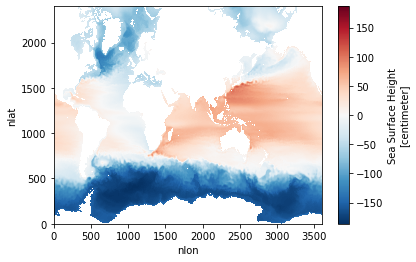

In [8]:
ds[variable_id].mean('time').plot()